In [4]:
#Coursera Capstone


In [31]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [6]:
#For this week, your main task is to decide whether you want to use the shared data or find your own dataset. In case, you choose to find your own dataset from the resources that are suggested in Week-1 video, your dataset should meet the following criteria: 

#The target or label columns should be accident "severity" in terms of human fatality, traffic delay, property damage, or any other type of accident bad impact. 
#The machine learning model should be able to predict accident "severity"
#To build a good model, the dataset should be rich and contain many observations (rows) and various attributes (columns)


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [33]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-06 06:23:57--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  21.6MB/s   in 3.5s   

2020-09-06 06:24:01 (20.2 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [34]:
df = pd.read_csv("Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [36]:
# summarize the data
df.describe()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [37]:
df.shape

(194673, 38)

In [38]:
#data visualizatin and pr-processing 
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [39]:
# notice: installing seaborn might take a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



In [45]:
import seaborn as sns

bins = np.linspace(df.SEVERITYCODE.min(), df.SEVERITYCODE.max(), 10)
g = sns.FacetGrid(df, col="STATUS", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ROADCOND', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

TypeError: '<=' not supported between instances of 'str' and 'float'

ValueError: color kwarg must have one color per data set. 132530 data sets and 1 colors were provided

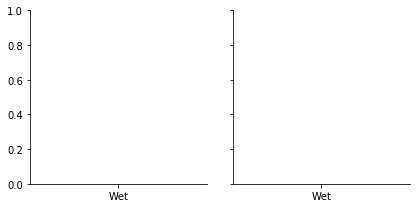

In [44]:
bins = np.linspace(df.VEHCOUNT.min(), df.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df, col="STATUS", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ROADCOND', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [46]:
#Pre-processing: Feature selection/extraction
df['PERSONCOUNT'] = df['VEHCOUNT].dt.PERSONCOUNT
bins = np.linspace(df.dayofweek.min(), df.PERSONCOUNT.max(), 10)
g = sns.FacetGrid(df, col="STATUS", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-46-57af687c8dce>, line 2)

In [47]:
df['PEDCOUNT'] = df['PERSONCOUNT'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [48]:
#Convert Categorical features to numerical values
df.groupby(['STATUS'])['SEVERITYCODE'].value_counts(normalize=True)


STATUS     SEVERITYCODE
Matched    1               0.698824
           2               0.301176
Unmatched  1               0.789441
           2               0.210559
Name: SEVERITYCODE, dtype: float64

In [49]:
#convert male to 0 and female to 1:
df['STATUS'].replace(to_replace=['UNMATCHED','MATCHED'], value=[0,1],inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [50]:
#one hot encoding
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [51]:
#feature before 0ne hot encoding 
df[['LIGHTCOND','SPEEDING', 'ADDRTYPE']].head()

,LIGHTCOND,SPEEDING,ADDRTYPE
0,Daylight,NaN,Intersection
1,Dark - Street Lights On,NaN,Block
2,Daylight,NaN,Block
3,Daylight,NaN,Block
4,Daylight,NaN,Intersection


In [52]:
Feature = df[['LIGHTCOND','SPEEDING']]
Feature = pd.concat([Feature,pd.get_dummies(df['ADDRTYPE'])], axis=1)
Feature.drop(['SPEEDING'], axis = 1,inplace=True)
Feature.head()

,LIGHTCOND,Alley,Block,Intersection
0,Daylight,0,0,1
1,Dark - Street Lights On,0,1,0
2,Daylight,0,1,0
3,Daylight,0,1,0
4,Daylight,0,0,1


In [53]:
#define feature set X
X = Feature
X[0:5]


,LIGHTCOND,Alley,Block,Intersection
0,Daylight,0,0,1
1,Dark - Street Lights On,0,1,0
2,Daylight,0,1,0
3,Daylight,0,1,0
4,Daylight,0,0,1


In [54]:
#labels
y = df['SEVERITYCODE'].values
y[0:5]
y.shape

(194673,)

In [55]:
#normalize
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
X.shape

NameError: name 'preprocessing' is not defined

In [56]:
#KNN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


In [57]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

ValueError: could not convert string to float: 'Daylight'